In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 50)

nobel_path = "nobel_prizes_1901-2025_cleaned.csv"
hdi_path = "hdr_general.csv"   # kasutame hiljem teises notebookis

nobel = pd.read_csv(nobel_path)

nobel.head()


,award_year,date_awarded,prize_amount,prize_amount_adjusted,laureate_id,known_name,full_name,sex,portion,sort_order,motivation,category,birth_date,birth_city,birth_country,birth_latitude,birth_longitude,death_date,death_city,death_country,death_latitude,death_longitude,affiliation_name,affiliation_city,affiliation_country,affiliation_latitude,affiliation_longitude,wikipedia_url,is_shared,winners_per_year,winners_per_category,is_repeat_winner,country_winner_rank
0,1901,11/12/1901,150782,10833458,160.0,Jacobus H. van 't Hoff,Jacobus Henricus van 't Hoff,male,1.0,1.0,in recognition of the extraordinary services h...,Chemistry,1852-08-30,Rotterdam,the Netherlands,51.925205,4.489110,3/1/1911,Berlin,Germany,52.522265,13.406852,Berlin University,Berlin,Germany,52.522265,13.406852,https://en.wikipedia.org/wiki/Jacobus_Henricus...,0,6,200,0,1.0
1,1901,11/14/1901,150782,10833458,569.0,Sully Prudhomme,Sully Prudhomme,male,1.0,1.0,in special recognition of his poetic compositi...,Literature,1839-03-16,Paris,France,48.860093,2.355954,9/7/1907,Châtenay,France,48.765278,2.278056,NaN,NaN,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Sully_Prudhomme,0,6,122,0,1.0
2,1901,12/10/1901,150782,10833458,462.0,Henry Dunant,Jean Henry Dunant,male,0.5,1.0,for his humanitarian efforts to help wounded s...,Peace,1828-05-08,Geneva,Switzerland,46.203397,6.145957,10/30/1910,Heiden,Switzerland,47.441111,9.531111,Red Cross,Geneva,Switzerland,NaN,NaN,https://en.wikipedia.org/wiki/Henry_Dunant,1,6,112,0,1.0
3,1901,12/10/1901,150782,10833458,463.0,Frédéric Passy,Frédéric Passy,male,0.5,2.0,for his lifelong work for international peace ...,Peace,1822-05-20,Paris,France,48.860093,2.355954,6/12/1912,Paris,France,48.860093,2.355954,NaN,NaN,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Frédéric_Passy,1,6,112,0,2.0
4,1901,11/12/1901,150782,10833458,1.0,Wilhelm Conrad Röntgen,Wilhelm Conrad Röntgen,male,1.0,1.0,in recognition of the extraordinary services h...,Physics,1845-03-27,Remscheid,Germany,51.178742,7.189696,2/10/1923,Munich,Germany,48.134703,11.581995,Munich University,Munich,Germany,48.134703,11.581995,https://en.wikipedia.org/wiki/Wilhelm_Röntgen,0,6,230,0,1.0


In [2]:
nobel.info()
nobel.describe(include="all").T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   award_year             995 non-null    int64  
 1   date_awarded           995 non-null    object 
 2   prize_amount           995 non-null    int64  
 3   prize_amount_adjusted  995 non-null    int64  
 4   laureate_id            995 non-null    float64
 5   known_name             995 non-null    object 
 6   full_name              995 non-null    object 
 7   sex                    752 non-null    object 
 8   portion                995 non-null    float64
 9   sort_order             995 non-null    float64
 10  motivation             995 non-null    object 
 11  category               995 non-null    object 
 12  birth_date             752 non-null    object 
 13  birth_city             750 non-null    object 
 14  birth_country          751 non-null    object 
 15  birth_

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
award_year,995.0,NaN,NaN,NaN,1974.826131,35.009814,1901.0,1950.0,1980.0,2004.0,2025.0
date_awarded,995,470,11/14/1946,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prize_amount,995.0,NaN,NaN,NaN,3959410.19196,4275931.764972,114935.0,172760.0,880000.0,9000000.0,11000000.0
prize_amount_adjusted,995.0,NaN,NaN,NaN,8030974.831156,4101195.779479,3006134.0,3923237.0,6845037.0,11603589.0,15547541.0
laureate_id,995.0,NaN,NaN,NaN,518.186935,307.86418,1.0,249.5,505.0,780.5,1060.0
known_name,995,990,John Bardeen,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
full_name,995,990,John Bardeen,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,752,2,male,703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
portion,995.0,NaN,NaN,NaN,0.61139,0.292668,0.25,0.333333,0.5,1.0,1.0
sort_order,995.0,NaN,NaN,NaN,1.510553,0.702567,1.0,1.0,1.0,2.0,3.0


In [3]:
# award_year must be 1901–2025
print(nobel["award_year"].min(), nobel["award_year"].max())

print("Categories:")
print(nobel["category"].value_counts())

1901 2025
Categories:
category
Physiology or Medicine    232
Physics                   230
Chemistry                 200
Literature                122
Peace                     112
Economic Sciences          99
Name: count, dtype: int64


In [4]:
critical_cols = ["birth_date", "birth_country", "sex"]
nobel[critical_cols].isna().mean().sort_values()

birth_date       0.244221
sex              0.244221
birth_country    0.245226
dtype: float64

In [5]:
# Check for potential duplicate laureate records
dup_mask = nobel.duplicated(subset=["laureate_id", "award_year", "category"], keep=False)
duplicates = nobel[dup_mask].sort_values(["laureate_id", "award_year", "category"])

print(f"Number of potential duplicate rows: {duplicates.shape[0]}")
duplicates.head(10)

Number of potential duplicate rows: 0


,award_year,date_awarded,prize_amount,prize_amount_adjusted,laureate_id,known_name,full_name,sex,portion,sort_order,motivation,category,birth_date,birth_city,birth_country,birth_latitude,birth_longitude,death_date,death_city,death_country,death_latitude,death_longitude,affiliation_name,affiliation_city,affiliation_country,affiliation_latitude,affiliation_longitude,wikipedia_url,is_shared,winners_per_year,winners_per_category,is_repeat_winner,country_winner_rank


This means that about 24% of the data is missing critical columns

In [6]:
# looking if data is missing more in certain years
birth_missing_stats = (
    nobel
    .assign(has_birth_date = nobel["birth_date"].notna())
    .groupby("award_year")
    .agg(
        n=("has_birth_date", "size"),
        share_with_birth_date=("has_birth_date", "mean"),
    )
)

birth_missing_stats["share_missing_birth_date"] = 1 - birth_missing_stats["share_with_birth_date"]


birth_missing_stats.sort_values("share_missing_birth_date", ascending=False).head(20)

,n,share_with_birth_date,share_missing_birth_date
award_year,,,
2025,14,0.285714,0.714286
1968,7,0.285714,0.714286
2019,14,0.357143,0.642857
1988,11,0.363636,0.636364
1967,8,0.375000,0.625000
2011,13,0.384615,0.615385
1973,12,0.416667,0.583333
2007,11,0.454545,0.545455
2017,11,0.454545,0.545455


In [7]:
import re

def extract_year(date_str):
    """Võtab suvalisest kuupäevastringist (nt '1852-08-30', '1/4/1940', '1898-00-00')
       välja neljakohalise aasta. Kui ei leia, tagastab NaN."""
    if pd.isna(date_str):
        return np.nan
    s = str(date_str)
    m = re.search(r"(\d{4})", s)
    if m:
        y = int(m.group(1))
        if 1800 <= y <= 2025:  # välistame suvalise müra
            return y
    return np.nan

nobel["birth_year"] = nobel["birth_date"].apply(extract_year)

nobel["age_at_award"] = nobel["award_year"] - nobel["birth_year"]

nobel["age_at_award"].describe(), nobel["age_at_award"].notna().sum()

(count    752.00000
 mean      59.12367
 std       12.47749
 min       17.00000
 25%       50.00000
 50%       59.00000
 75%       68.00000
 max       97.00000
 Name: age_at_award, dtype: float64,
 np.int64(752))

In [8]:
age_coverage = nobel["age_at_award"].notna().mean()
print(f"Age available: {age_coverage:.1%} of rows")

Age available: 75.6% of rows


In [9]:
if "decade" not in nobel.columns:
    nobel["decade"] = (nobel["award_year"] // 10) * 10

In [10]:
age_cov_by_decade = (
    nobel.assign(has_age = nobel["age_at_award"].notna())
         .groupby("decade")["has_age"]
         .agg(["size", "mean"])
         .rename(columns={"size": "n", "mean": "share_with_age"})
)

age_cov_by_decade["share_missing_age"] = 1 - age_cov_by_decade["share_with_age"]
age_cov_by_decade.sort_index()

,n,share_with_age,share_missing_age
decade,,,
1900,56,1.000000,0.000000
1910,38,1.000000,0.000000
1920,54,1.000000,0.000000
1930,55,1.000000,0.000000
1940,40,1.000000,0.000000
1950,71,1.000000,0.000000
1960,75,0.813333,0.186667
1970,103,0.699029,0.300971
1980,94,0.585106,0.414894


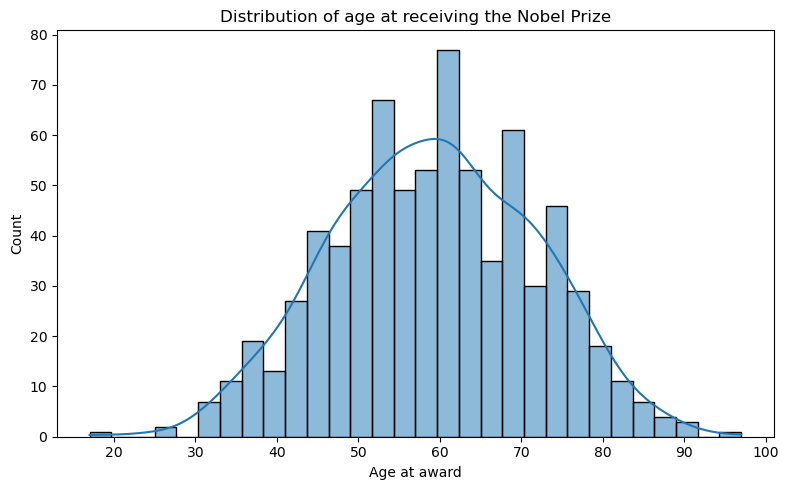

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(
    data=nobel,
    x="age_at_award",
    bins=30,
    kde=True
)
plt.title("Distribution of age at receiving the Nobel Prize")
plt.xlabel("Age at award")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

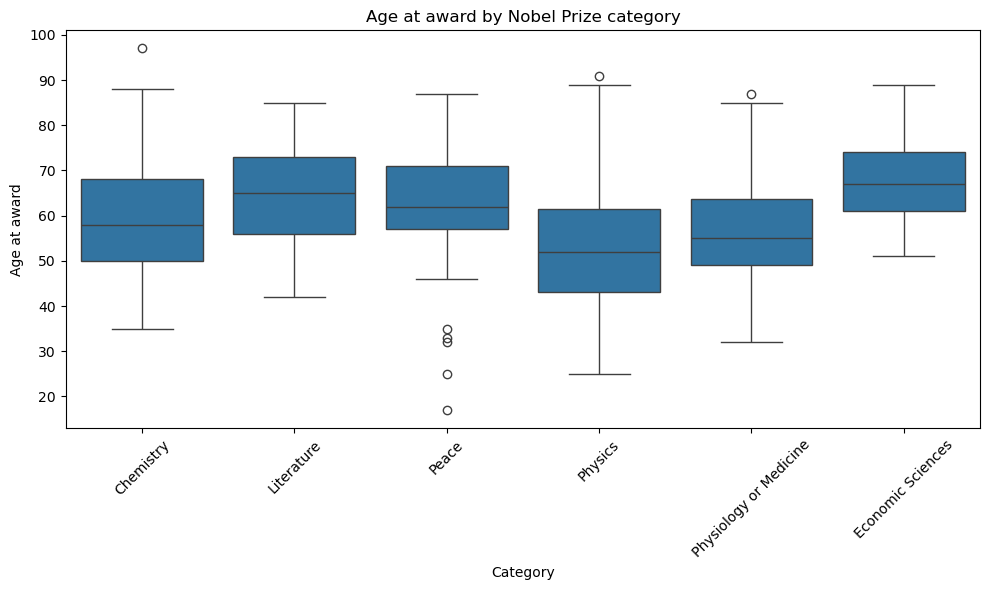

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=nobel,
    x="category",
    y="age_at_award"
)
plt.title("Age at award by Nobel Prize category")
plt.xlabel("Category")
plt.ylabel("Age at award")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
age_by_category = (
    nobel
    .groupby("category")["age_at_award"]
    .describe()
    .round(1)
)

age_by_category

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Chemistry,198.0,59.2,12.1,35.0,50.0,58.0,68.0,97.0
Economic Sciences,53.0,67.4,8.5,51.0,61.0,67.0,74.0,89.0
Literature,119.0,64.7,10.1,42.0,56.0,65.0,73.0,85.0
Peace,85.0,61.9,12.8,17.0,57.0,62.0,71.0,87.0
Physics,143.0,52.9,13.5,25.0,43.0,52.0,61.5,91.0
Physiology or Medicine,154.0,56.1,10.8,32.0,49.0,55.0,63.8,87.0


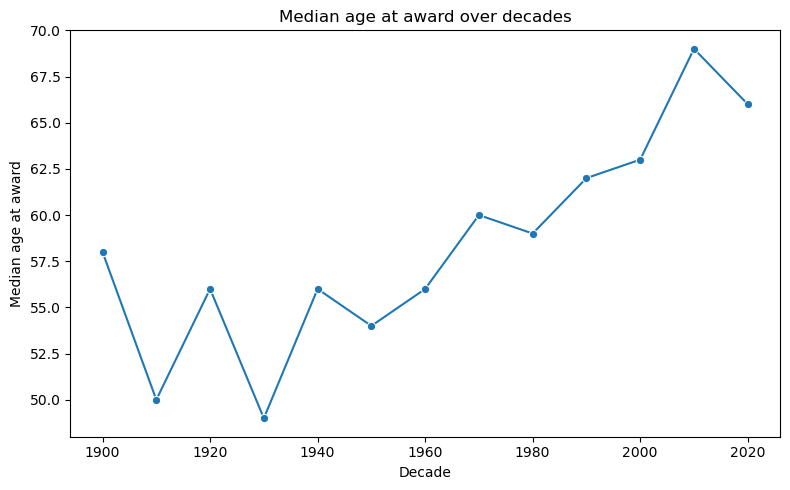

,decade,median_age
0,1900,58.0
1,1910,50.0
2,1920,56.0
3,1930,49.0
4,1940,56.0
5,1950,54.0
6,1960,56.0
7,1970,60.0
8,1980,59.0
9,1990,62.0


In [14]:
age_by_decade = (
    nobel
    .dropna(subset=["age_at_award"])
    .groupby("decade")["age_at_award"]
    .median()
    .reset_index(name="median_age")
)

plt.figure(figsize=(8, 5))
sns.lineplot(
    data=age_by_decade,
    x="decade",
    y="median_age",
    marker="o"
)
plt.title("Median age at award over decades")
plt.xlabel("Decade")
plt.ylabel("Median age at award")
plt.tight_layout()
plt.show()

age_by_decade

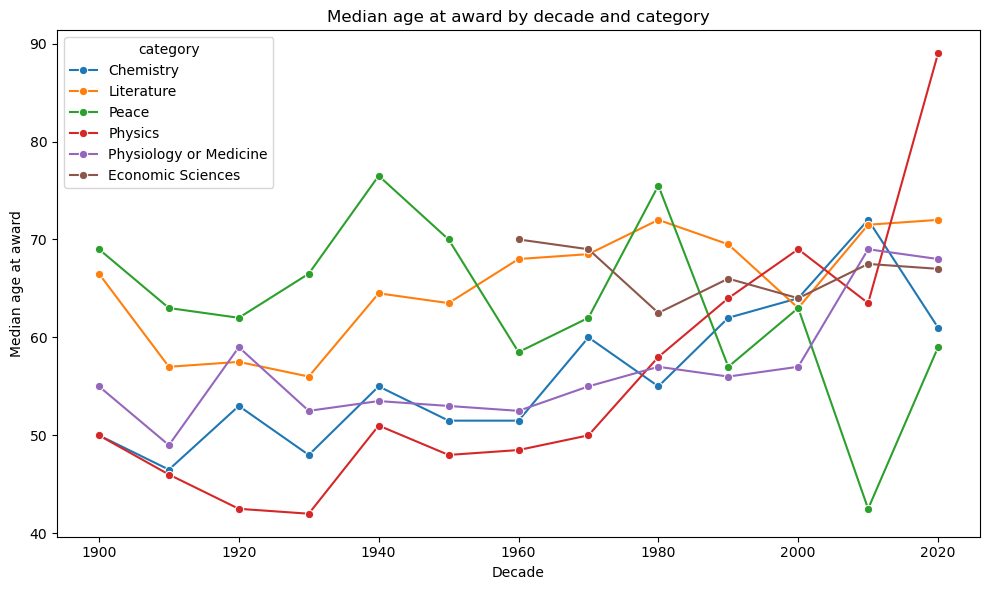

,decade,category,median_age
0,1900,Chemistry,50.0
1,1900,Literature,66.5
2,1900,Peace,69.0
3,1900,Physics,50.0
4,1900,Physiology or Medicine,55.0
5,1910,Chemistry,46.5
6,1910,Literature,57.0
7,1910,Peace,63.0
8,1910,Physics,46.0
9,1910,Physiology or Medicine,49.0


In [15]:
age_by_decade_category = (
    nobel
    .dropna(subset=["age_at_award"])
    .groupby(["decade", "category"])["age_at_award"]
    .median()
    .reset_index(name="median_age")
)

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=age_by_decade_category,
    x="decade",
    y="median_age",
    hue="category",
    marker="o"
)
plt.title("Median age at award by decade and category")
plt.xlabel("Decade")
plt.ylabel("Median age at award")
plt.tight_layout()
plt.show()

age_by_decade_category.head(20)

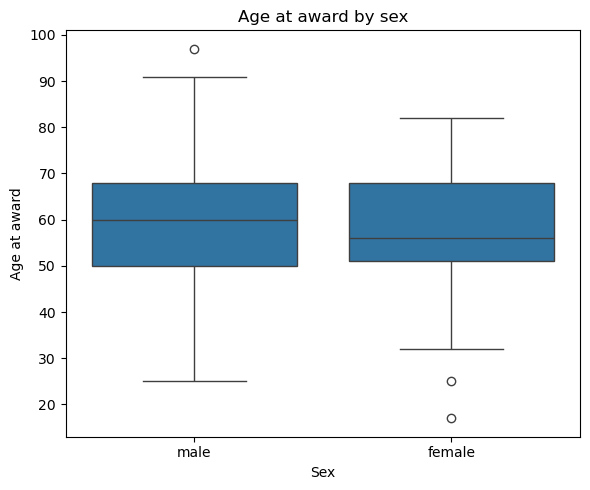

In [16]:
plt.figure(figsize=(6, 5))
sns.boxplot(
    data=nobel,
    x="sex",
    y="age_at_award"
)
plt.title("Age at award by sex")
plt.xlabel("Sex")
plt.ylabel("Age at award")
plt.tight_layout()
plt.show()

In [17]:
# Map birth and affiliation countries to broad regions
region_map = {
    # North America
    "USA": "North America",
    "United States": "North America",
    "Canada": "North America",
    "Mexico": "Latin America",  # often grouped with Latin America

    # Western / Northern Europe
    "United Kingdom": "Europe",
    "England": "Europe",
    "Scotland": "Europe",
    "Northern Ireland": "Europe",
    "Ireland": "Europe",
    "Germany": "Europe",
    "France": "Europe",
    "Sweden": "Europe",
    "Norway": "Europe",
    "Denmark": "Europe",
    "Belgium": "Europe",
    "the Netherlands": "Europe",
    "Netherlands": "Europe",
    "Switzerland": "Europe",
    "Austria": "Europe",
    "Finland": "Europe",
    "Iceland": "Europe",
    "Luxembourg": "Europe",

    # Southern / Eastern Europe
    "Italy": "Europe",
    "Spain": "Europe",
    "Portugal": "Europe",
    "Poland": "Europe",
    "Hungary": "Europe",
    "Czech Republic": "Europe",
    "Slovakia": "Europe",
    "Slovenia": "Europe",
    "Croatia": "Europe",
    "Lithuania": "Europe",
    "Belarus": "Europe",
    "Ukraine": "Europe",
    "Russia": "Europe/Asia",
    "Bosnia and Herzegovina": "Europe",
    "North Macedonia": "Europe",
    "Faroe Islands (Denmark)": "Europe",
    "Guadeloupe, France": "Europe",

    # Asia
    "Japan": "Asia",
    "China": "Asia",
    "India": "Asia",
    "Pakistan": "Asia",
    "Bangladesh": "Asia",
    "Israel": "Asia",
    "Turkey": "Asia/Europe",
    "South Korea": "Asia",
    "Vietnam": "Asia",
    "Azerbaijan": "Asia",
    "Indonesia": "Asia",
    "Jordan": "Asia",
    "East Timor": "Asia",

    # Latin America & Caribbean
    "Argentina": "Latin America",
    "Brazil": "Latin America",
    "Chile": "Latin America",
    "Colombia": "Latin America",
    "Peru": "Latin America",
    "Venezuela": "Latin America",
    "Guatemala": "Latin America",
    "Trinidad and Tobago": "Latin America",
    "Saint Lucia": "Latin America",

    # Africa
    "South Africa": "Africa",
    "Egypt": "Africa",
    "Zimbabwe": "Africa",

    # Oceania
    "Australia": "Oceania",
    "New Zealand": "Oceania",
}

# First, map by birth_country
nobel["region"] = nobel["birth_country"].map(region_map)

# If region is still missing, try affiliation_country
if "affiliation_country" in nobel.columns:
    mask = nobel["region"].isna() & nobel["affiliation_country"].notna()
    nobel.loc[mask, "region"] = nobel.loc[mask, "affiliation_country"].map(region_map)

# All remaining missing values -> "Other"
nobel["region"] = nobel["region"].fillna("Location unknown")

nobel["region"].value_counts()

region
Europe              403
Location unknown    254
North America       225
Asia                 47
Europe/Asia          23
Latin America        16
Africa               13
Oceania              11
Asia/Europe           3
Name: count, dtype: int64

In [18]:
# Fix a few specific countries that were mapped to "Other"
extra_region_map = {
    "Algeria": "Africa",
    "Madagascar": "Africa",
    "Ghana": "Africa",
    "Nigeria": "Africa",
    "Democratic Republic of the Congo": "Africa",
    "Bulgaria": "Europe",
    "Romania": "Europe",
    "Iran": "Asia",
    "Iraq": "Asia",
    "Philippines": "Asia",
}

mask_other = nobel["region"] == "Location unknown"
nobel.loc[mask_other, "region"] = (
    nobel.loc[mask_other, "birth_country"].map(extra_region_map).fillna("Location unknown")
)

nobel["region"].value_counts()

region
Europe              405
Location unknown    244
North America       225
Asia                 50
Europe/Asia          23
Africa               18
Latin America        16
Oceania              11
Asia/Europe           3
Name: count, dtype: int64

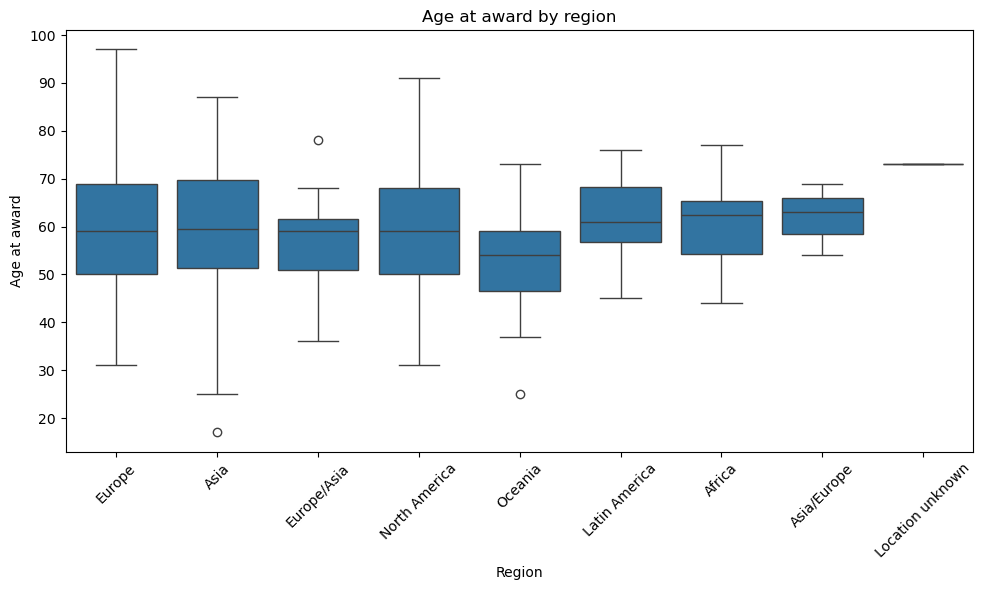

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=nobel,
    x="region",
    y="age_at_award"
)
plt.title("Age at award by region")
plt.xlabel("Region")
plt.ylabel("Age at award")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### <strong>Start for regression model</strong>

In [20]:
# Select columns needed for the regression model
cols_for_model = ["age_at_award", "category", "sex", "decade", "region"]

model_df = nobel[cols_for_model].dropna()

model_df.head(), model_df.shape

(   age_at_award    category   sex  decade  region
 0          49.0   Chemistry  male    1900  Europe
 1          62.0  Literature  male    1900  Europe
 2          73.0       Peace  male    1900  Europe
 3          79.0       Peace  male    1900  Europe
 4          56.0     Physics  male    1900  Europe,
 (752, 5))

In [21]:
import statsmodels.formula.api as smf

# age_at_award as outcome, categorical predictors plus linear trend in decade
formula = "age_at_award ~ C(category) + C(sex) + C(region) + decade"

age_model = smf.ols(formula=formula, data=model_df).fit()

age_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           age_at_award   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     16.33
Date:                Mon, 08 Dec 2025   Prob (F-statistic):           4.33e-37
Time:                        00:06:53   Log-Likelihood:                -2856.5
No. Observations:                 752   AIC:                             5745.
Df Residuals:                     736   BIC:                             5819.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                              -216.3562     26.089     -8.293      0.000    -267.575    -165.138
C(category)[T.Economic Sciences]          5.4965      1.728      3.181      0.002       2.104       8.889
C(category)[T.Literature]                 7.7048      1.328      5.803      0.000       5.098      10.312
C(category)[T.Peace]                      6.5784      1.478      4.450      0.000       3.676       9.481
C(category)[T.Physics]                   -4.2393      1.217     -3.482      0.001      -6.629      -1.849
C(category)[T.Physiology or Medicine]    -1.1607      1.195     -0.972      0.332      -3.506       1.185
C(sex)[T.male]                            6.8723      1.674      4.106      0.000       3.586      10.158
C(region)[T.Asia]                         0.5702      3.026      0.188      0.851      -5.371       6.512
C(region)[T.Asia/Europe]                 -1.0030      6.837     -0.147      0.883     -14.426      12.420
C(region)[T.Europe]                       5.8145      2.707      2.148      0.032       0.500      11.129
C(region)[T.Europe/Asia]                  0.5767      3.477      0.166      0.868      -6.249       7.402
C(region)[T.Latin America]                2.2271      3.776      0.590      0.556      -5.186       9.640
C(region)[T.Location unknown]             3.3983     11.262      0.302      0.763     -18.711      25.507
C(region)[T.North America]                2.8252      2.742      1.030      0.303      -2.558       8.208
C(region)[T.Oceania]                     -0.9464      4.256     -0.222      0.824      -9.302       7.410
decade                                    0.1343      0.013     10.460      0.000       0.109       0.160
==============================================================================
Omnibus:                        0.163   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.922   Jarque-Bera (JB):                0.106
Skew:                           0.026   Prob(JB):                        0.948
Kurtosis:                       3.026   Cond. No.                     1.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
coef_table = age_model.params.to_frame("coef")
conf_int = age_model.conf_int()
conf_int.columns = ["ci_low", "ci_high"]

coef_table = coef_table.join(conf_int)
coef_table = coef_table.round(2)

coef_table

,coef,ci_low,ci_high
Intercept,-216.36,-267.57,-165.14
C(category)[T.Economic Sciences],5.50,2.10,8.89
C(category)[T.Literature],7.70,5.10,10.31
C(category)[T.Peace],6.58,3.68,9.48
C(category)[T.Physics],-4.24,-6.63,-1.85
C(category)[T.Physiology or Medicine],-1.16,-3.51,1.18
C(sex)[T.male],6.87,3.59,10.16
C(region)[T.Asia],0.57,-5.37,6.51
C(region)[T.Asia/Europe],-1.00,-14.43,12.42
C(region)[T.Europe],5.81,0.50,11.13


## Region over time

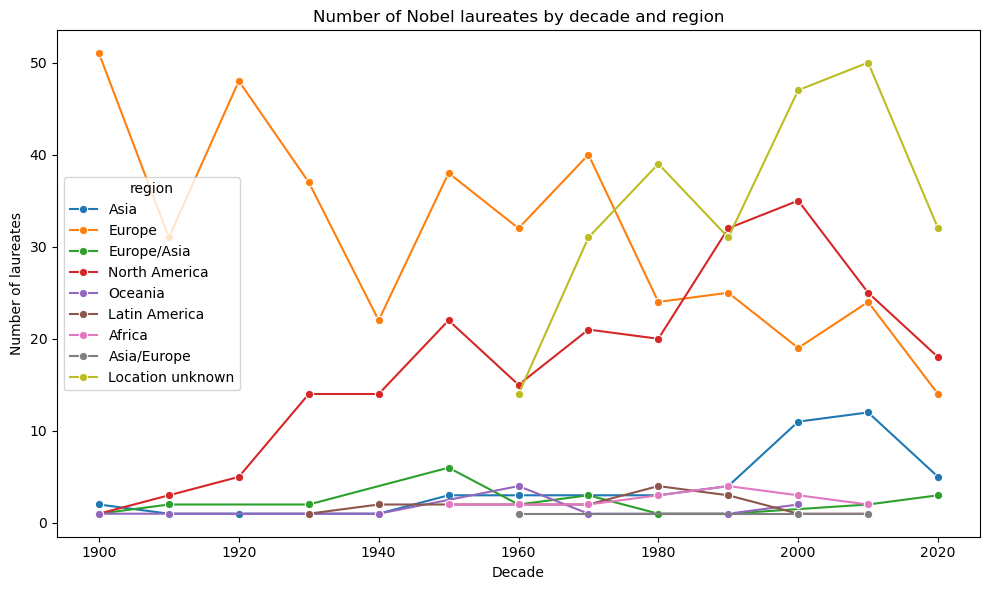

In [23]:
# Number of laureates by decade and region
region_counts = (
    nobel
    .groupby(["decade", "region"])
    .size()
    .reset_index(name="n_laureates")
)

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=region_counts,
    x="decade",
    y="n_laureates",
    hue="region",
    marker="o"
)
plt.title("Number of Nobel laureates by decade and region")
plt.xlabel("Decade")
plt.ylabel("Number of laureates")
plt.tight_layout()
plt.show()
